
# Credit Worthiness Prediction Model
## Modeling and Prediction


### Team Members:

<pre> Pablo Macaraeg</pre>
<pre> Jennifer Macaraeg</pre>
<pre> John Derek Requejo</pre>


### Loading Libraries

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot

init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Plotting imports and settings
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,8)

# ML imports
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold


from pathlib import Path
from tqdm import tqdm

### Loading the Dataset

In [2]:
#Load cleaned dataset to csv file

dfLoan = pd.read_csv('creditTrain_cleaned.csv')


In [3]:
X = dfLoan.drop("Loan_Status",axis=1)
y = dfLoan['Loan_Status']
print('X:', X.shape)
print('y:', y.shape)

X: (88516, 16)
y: (88516,)


In [4]:
X.columns

Index(['Current_Loan_Amount', 'Term', 'Credit_Score', 'Annual_Income',
       'Years_in_current_job', 'Home_Ownership', 'Purpose', 'Monthly_Debt',
       'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens',
       'Debt_To_Income_Ratio'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True)

In [6]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
fold_indices = skf.split(X_train, y_train)

# Predictive Modeling and Classification

Build the ML models and fit them to the dataset.
* Logistic Regression
* Naive Bayes
* K Nearest Neighbors
* Random Forests
* Decision Tree
* Support Vector Machine

In [7]:
def init_models():
    return [LogisticRegression(solver='lbfgs'),
            GaussianNB(),
            KNeighborsClassifier(n_neighbors=2),
            RandomForestClassifier(n_estimators=100),
            DecisionTreeClassifier(),
            SVC(gamma='scale')]

def calc_metrics(model, X, y):
    y_hat = model.predict(X)
    metrics = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
    scores = [fn(y, y_hat) for fn in metrics]
    return scores

In [8]:
fold_model_sets = []
fold_model_metrics = []

for train_idx, val_idx in fold_indices:
    # Split training for cross val fold
    X_fold = X_train.iloc[train_idx, :]
    y_fold = y_train.iloc[train_idx]
    X_val = X_train.iloc[val_idx, :]
    y_val = y_train.iloc[val_idx]

    # Fit models
    models = init_models()
    fit_models = []
    fit_metrics = []
    for model in tqdm(models):
        fit_models.append(model.fit(X_fold, y_fold))
        fit_metrics.append(calc_metrics(model, X_val, y_val))
    
    # Store models and metrics for fold
    fold_model_sets.append(fit_models)
    fold_model_metrics.append(fit_metrics)

# Move to numpy
fold_model_metrics = np.array(fold_model_metrics)

100%|██████████| 6/6 [01:39<00:00, 27.38s/it]


Average validation scores to determine the best model.

In [9]:
fold_model_metrics.shape

(5, 6, 5)

In [10]:
models = init_models()
model_names = []
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

mean_model_metrics = fold_model_metrics.mean(axis=0)
max_model_metrics = fold_model_metrics.max(axis=0)

for i in range(mean_model_metrics.shape[0]):
    print('\n')
    model_name = str(models[i]).split('(')[0]
    model_names.append(model_name)
    print(model_name)
    
    print('_' * len(model_name))
    
    for j in range(mean_model_metrics.shape[1]):
        print(f"{metric_names[j]}: {mean_model_metrics[i, j]:.3f} (max {max_model_metrics[i, j]:.3f})")



LogisticRegression
__________________
Accuracy: 0.744 (max 0.744)
Precision: 0.744 (max 0.744)
Recall: 1.000 (max 1.000)
F1: 0.853 (max 0.853)
AUC: 0.500 (max 0.500)


GaussianNB
__________
Accuracy: 0.393 (max 0.606)
Precision: 0.772 (max 0.806)
Recall: 0.266 (max 0.692)
F1: 0.343 (max 0.723)
AUC: 0.513 (max 0.524)


KNeighborsClassifier
____________________
Accuracy: 0.562 (max 0.569)
Precision: 0.766 (max 0.770)
Recall: 0.593 (max 0.600)
F1: 0.669 (max 0.674)
AUC: 0.533 (max 0.539)


RandomForestClassifier
______________________
Accuracy: 0.745 (max 0.746)
Precision: 0.754 (max 0.755)
Recall: 0.975 (max 0.977)
F1: 0.850 (max 0.851)
AUC: 0.524 (max 0.526)


DecisionTreeClassifier
______________________
Accuracy: 0.665 (max 0.670)
Precision: 0.772 (max 0.775)
Recall: 0.780 (max 0.785)
F1: 0.776 (max 0.780)
AUC: 0.555 (max 0.561)


SVC
___
Accuracy: 0.744 (max 0.744)
Precision: 0.744 (max 0.744)
Recall: 1.000 (max 1.000)
F1: 0.853 (max 0.853)
AUC: 0.500 (max 0.500)


In [11]:
metrics = pd.DataFrame(mean_model_metrics.T, columns=model_names, index=metric_names)
metrics

,LogisticRegression,GaussianNB,KNeighborsClassifier,RandomForestClassifier,DecisionTreeClassifier,SVC
Accuracy,0.744242,0.392533,0.562354,0.744574,0.664995,0.744227
Precision,0.744242,0.771659,0.766060,0.753766,0.772322,0.744238
Recall,1.000000,0.266360,0.593062,0.975449,0.779732,0.999980
F1,0.853370,0.343187,0.668541,0.850397,0.776008,0.853360
AUC,0.500000,0.513034,0.533029,0.524093,0.555424,0.499990


# Tune

In [12]:
model = SVC(gamma='scale')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
for i, metric in enumerate(calc_metrics(model, X_test, y_test)):
        print(f"{metric_names[i]}: {metric:.3f}")

Accuracy: 0.744
Precision: 0.744
Recall: 1.000
F1: 0.853
AUC: 0.500


# Model Performance and Confusion Matrix

In [14]:
test_models = init_models()
test_metrics = np.zeros([len(test_models), len(metric_names)])
for i, model in enumerate(tqdm(test_models)):
    test_models[i] = model.fit(X_train, y_train)
    test_metrics[i, :] = np.array(calc_metrics(model, X_test, y_test))

100%|██████████| 6/6 [02:43<00:00, 45.58s/it]


Text(0.5, 1.0, 'Test Performance')

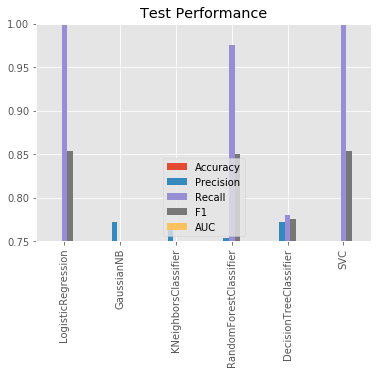

In [15]:
metrics.T.plot.bar()
plt.legend(loc='lower center')
plt.ylim([0.75, 1])
plt.title('Test Performance')

[[    0  5660]
 [    0 16469]]


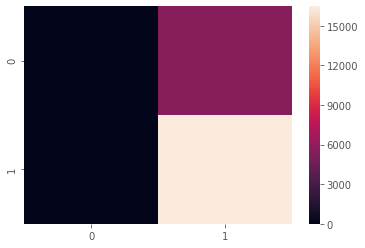

In [16]:
y_hat = test_models[-1].predict(X_test)
conf = confusion_matrix(y_test, y_hat)
print(conf)
sns.heatmap(conf);

In [17]:
mask = y_hat == 0
conf = confusion_matrix(y_test[mask], y_hat[mask])
conf

array([], shape=(0, 0), dtype=int64)

# Balancing of Data

<pre>Based on the given dataset, the data is imbalance based on loan Status, hence, we need to 
balance the data to have more accurate prediction.
To balance the data, we replicated the charged off multiple times until the data become
balanced.</pre>

In [18]:
dfLoan_new = dfLoan[dfLoan['Loan_Status'] == 0] # get the charged off rows since this is the minority
dfLoan_new2 = dfLoan.append(dfLoan_new)
dfLoan_new3 = dfLoan_new2.append(dfLoan_new)

dfLoan_new3.shape

(133794, 17)

In [19]:
dfLoan_new3.describe()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Debt_To_Income_Ratio
count,133794.000000,133794.000000,133794.000000,133794.000000,1.337940e+05,133794.00000,133794.000000,133794.000000,133794.000000,133794.000000,133794.000000,133794.000000,1.337940e+05,1.337940e+05,133794.000000,133794.000000,133794.000000
mean,0.492376,316598.492832,0.684537,1.074988,1.347245e+06,8.01279,1.967719,3.807136,18558.576566,18.064242,11.165471,0.169298,2.921706e+05,7.196064e+05,0.116059,0.031093,0.174230
std,0.499944,186236.685047,0.464702,0.459935,1.103442e+06,5.17671,0.955082,2.307851,12173.246264,7.030994,5.020334,0.486668,3.759529e+05,7.328281e+06,0.348997,0.266898,0.086574
min,0.000000,10802.000000,0.000000,0.000000,7.662700e+04,0.50000,0.000000,0.000000,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,174636.000000,0.000000,1.000000,9.209110e+05,3.00000,1.000000,3.000000,10348.017500,13.300000,8.000000,0.000000,1.147030e+05,2.691260e+05,0.000000,0.000000,0.110755
50%,0.000000,269852.000000,1.000000,1.000000,1.371078e+06,8.00000,2.000000,3.000000,16333.160000,16.800000,10.000000,0.000000,2.113940e+05,4.573360e+05,0.000000,0.000000,0.168001
75%,1.000000,435028.000000,1.000000,1.000000,1.435080e+06,15.00000,3.000000,3.000000,24052.480000,21.500000,14.000000,0.000000,3.675312e+05,7.599680e+05,0.000000,0.000000,0.230998
max,1.000000,789250.000000,1.000000,2.000000,1.655574e+08,15.00000,3.000000,15.000000,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000,1.327852


In [20]:
dfLoanBal = dfLoan_new3

In [21]:
X2 = dfLoanBal.drop("Loan_Status",axis=1)
y2 = dfLoanBal['Loan_Status']
print('X:', X2.shape)
print('y:', y2.shape)

X: (133794, 16)
y: (133794,)


In [22]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, stratify=y2, shuffle=True)

In [23]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
fold_indices = skf.split(X2_train, y2_train)

# Model the Balanced Dataset

In [24]:
def init_models():
    return [LogisticRegression(solver='lbfgs'),
            GaussianNB(),
            KNeighborsClassifier(n_neighbors=2),
            RandomForestClassifier(n_estimators=100),
            DecisionTreeClassifier(),
            SVC(gamma='scale')]

def calc_metrics(model, X2, y2):
    y_hat = model.predict(X2)
    metrics = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
    scores = [fn(y2, y_hat) for fn in metrics]
    return scores

In [25]:
fold_model_sets = []
fold_model_metrics = []

for train_idx, val_idx in fold_indices:
    # Split training for cross val fold
    X_fold = X2_train.iloc[train_idx, :]
    y_fold = y2_train.iloc[train_idx]
    X_val = X2_train.iloc[val_idx, :]
    y_val = y2_train.iloc[val_idx]

    # Fit models
    models = init_models()
    fit_models = []
    fit_metrics = []
    for model in tqdm(models):
        fit_models.append(model.fit(X_fold, y_fold))
        fit_metrics.append(calc_metrics(model, X_val, y_val))
    
    # Store models and metrics for fold
    fold_model_sets.append(fit_models)
    fold_model_metrics.append(fit_metrics)

# Move to numpy
fold_model_metrics = np.array(fold_model_metrics)

100%|██████████| 6/6 [07:23<00:00, 128.54s/it]


In [26]:
fold_model_metrics.shape

(5, 6, 5)

In [27]:
models = init_models()
model_names = []
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

mean_model_metrics = fold_model_metrics.mean(axis=0)
max_model_metrics = fold_model_metrics.max(axis=0)

for i in range(mean_model_metrics.shape[0]):
    print('\n')
    model_name = str(models[i]).split('(')[0]
    model_names.append(model_name)
    print(model_name)
    
    print('_' * len(model_name))
    
    for j in range(mean_model_metrics.shape[1]):
        print(f"{metric_names[j]}: {mean_model_metrics[i, j]:.3f} (max {max_model_metrics[i, j]:.3f})")



LogisticRegression
__________________
Accuracy: 0.558 (max 0.562)
Precision: 0.557 (max 0.561)
Recall: 0.502 (max 0.511)
F1: 0.528 (max 0.533)
AUC: 0.557 (max 0.561)


GaussianNB
__________
Accuracy: 0.511 (max 0.516)
Precision: 0.589 (max 0.639)
Recall: 0.042 (max 0.155)
F1: 0.070 (max 0.240)
AUC: 0.504 (max 0.511)


KNeighborsClassifier
____________________
Accuracy: 0.709 (max 0.714)
Precision: 0.877 (max 0.884)
Recall: 0.475 (max 0.482)
F1: 0.617 (max 0.624)
AUC: 0.705 (max 0.711)


RandomForestClassifier
______________________
Accuracy: 0.861 (max 0.862)
Precision: 0.887 (max 0.889)
Recall: 0.821 (max 0.826)
F1: 0.853 (max 0.855)
AUC: 0.860 (max 0.862)


DecisionTreeClassifier
______________________
Accuracy: 0.813 (max 0.815)
Precision: 0.881 (max 0.887)
Recall: 0.717 (max 0.722)
F1: 0.790 (max 0.793)
AUC: 0.811 (max 0.814)


SVC
___
Accuracy: 0.559 (max 0.564)
Precision: 0.561 (max 0.564)
Recall: 0.476 (max 0.507)
F1: 0.515 (max 0.534)
AUC: 0.557 (max 0.563)


In [28]:
metrics = pd.DataFrame(mean_model_metrics.T, columns=model_names, index=metric_names)
metrics

,LogisticRegression,GaussianNB,KNeighborsClassifier,RandomForestClassifier,DecisionTreeClassifier,SVC
Accuracy,0.558005,0.511296,0.708864,0.860501,0.812796,0.558513
Precision,0.556717,0.589008,0.876905,0.886950,0.880754,0.560882
Recall,0.502307,0.042300,0.475449,0.821385,0.716868,0.475975
F1,0.528101,0.070063,0.616585,0.852903,0.790397,0.514823
AUC,0.557169,0.504257,0.705361,0.859914,0.811356,0.557274


In [29]:
model = SVC(gamma='scale')
model.fit(X2_train, y2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
for i, metric in enumerate(calc_metrics(model, X2_test, y2_test)):
        print(f"{metric_names[i]}: {metric:.3f}")

Accuracy: 0.562
Precision: 0.564
Recall: 0.490
F1: 0.524
AUC: 0.561


In [31]:
test_models = init_models()
test_metrics = np.zeros([len(test_models), len(metric_names)])
for i, model in enumerate(tqdm(test_models)):
    test_models[i] = model.fit(X2_train, y2_train)
    test_metrics[i, :] = np.array(calc_metrics(model, X2_test, y2_test))

100%|██████████| 6/6 [11:37<00:00, 204.12s/it]


Text(0.5, 1.0, 'Test Performance')

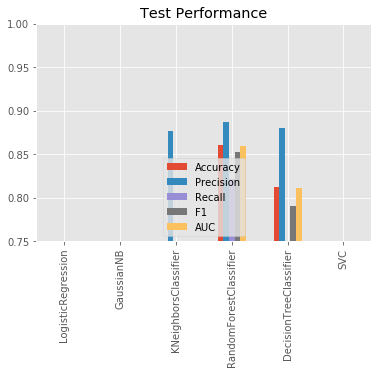

In [32]:
metrics.T.plot.bar()
plt.legend(loc='lower center')
plt.ylim([0.75, 1])
plt.title('Test Performance')

[[10738  6242]
 [ 8407  8062]]


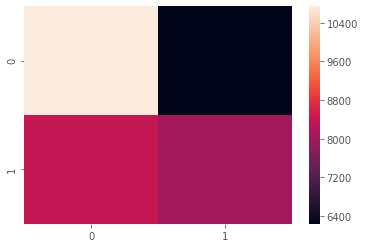

In [33]:
y_hat = test_models[-1].predict(X2_test)
conf = confusion_matrix(y2_test, y_hat)
print(conf)
sns.heatmap(conf);

## Save the Final Model

In [35]:
# Save Model Using Pickle
import pickle

# Fit the model on training set
model = RandomForestClassifier()
model.fit(X2_train, y2_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))



In [37]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X2_test, y2_test)
print(result)

0.8603844659033155


# Predict

In [53]:
# example of making a single class prediction
from sklearn.datasets.samples_generator import make_blobs

data = pd.read_csv('creditTest_cleaned.csv')


data.loc[:,'prediction'] = loaded_model.predict(data)



In [55]:
# show output with prediction column
data.to_csv('credit_data_withPrediction.csv',index=False)

data.head(5)

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Debt_To_Income_Ratio,prediction
0,611314.0,1,2,2074116.0,15.0,1,3,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,0.243000,1.0
1,266662.0,1,1,1919190.0,15.0,1,3,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,0.228999,1.0
2,153494.0,1,1,871112.0,2.0,3,3,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,0.115600,0.0
3,176242.0,1,1,780083.0,15.0,3,3,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,0.258001,0.0
4,321992.0,1,2,1761148.0,15.0,1,3,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0.268998,1.0
